<a href="https://colab.research.google.com/github/Kali-AI02/FUTURE_ML_01/blob/main/Predict_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict House Prices project

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
import zipfile
import pandas as pd

# Path to your ZIP file
zip_file_path = '/content/drive/MyDrive/house-prices-advanced-regression-techniques.zip'

# Extract the desired CSV file (e.g., 'train.csv')
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract('train.csv', '/content/drive/My Drive/')

# Now you can read the extracted CSV file
df = pd.read_csv('/content/drive/My Drive/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Check missing values
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0].sort_values(ascending=False))


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [ ]:
df['Alley'].fillna('None', inplace=True)
df['PoolQC'].fillna('None', inplace=True)
df['Fence'].fillna('None', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)


<ipython-input-22-0b44bfd35032>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alley'].fillna('None', inplace=True)
<ipython-input-22-0b44bfd35032>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [ ]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)  # Assuming missing means no veneer area


<ipython-input-23-a76821b972c1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
<ipython-input-23-a76821b972c1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
garage_columns = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_columns:
    df[col].fillna('None', inplace=True)
df['GarageYrBlt'].fillna(0, inplace=True)


<ipython-input-24-5bd6af8d50d4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('None', inplace=True)
<ipython-input-24-5bd6af8d50d4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [ ]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)


<ipython-input-25-c2631711659f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)


In [ ]:
df.head(20)
df.shape

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,60,RL,69.0,10382,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [ ]:
# Basic statistics
print(df.describe())

# Data types and non-null counts
print(df.info())


        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ..

1. Distribution of Sale Prices

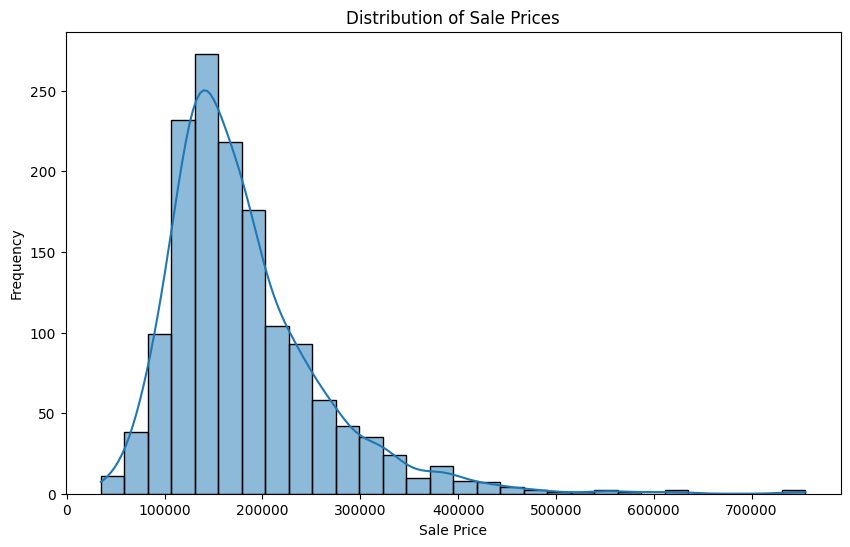

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()







Numeric columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Non-numeric columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Bs

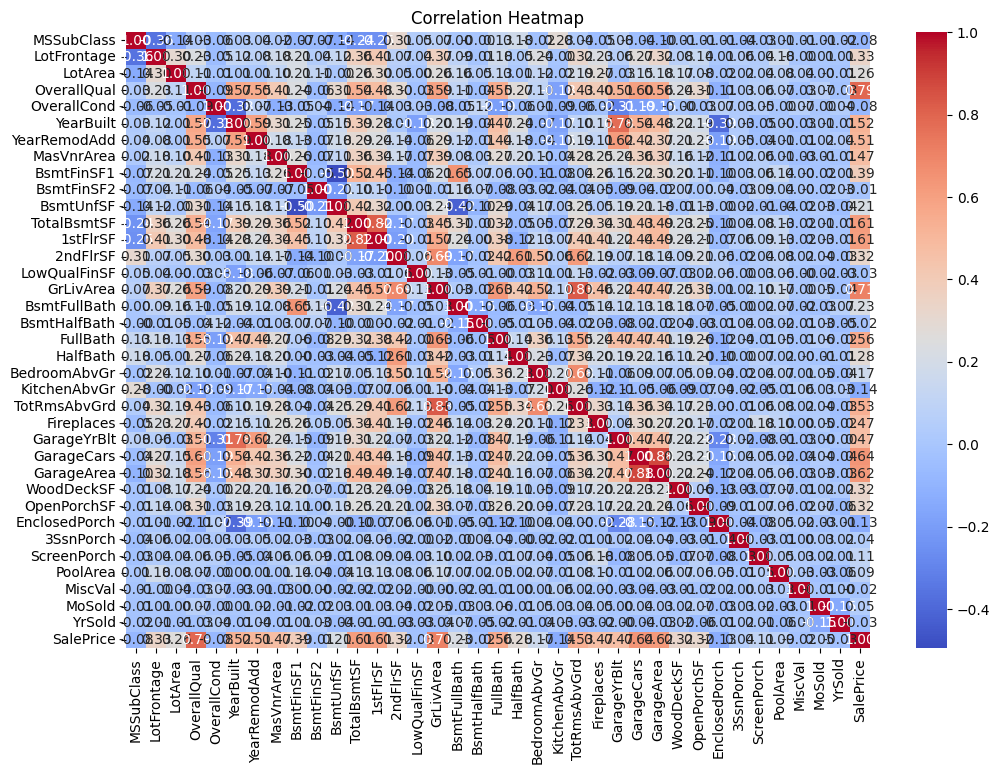

In [ ]:
# Check for non-numeric columns
print("Numeric columns:", df.select_dtypes(include=['number']).columns)
print("Non-numeric columns:", df.select_dtypes(exclude=['number']).columns)

# Drop non-numeric columns (if you don't need them)
df_numeric = df.select_dtypes(include=['number'])

# Calculate and plot correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




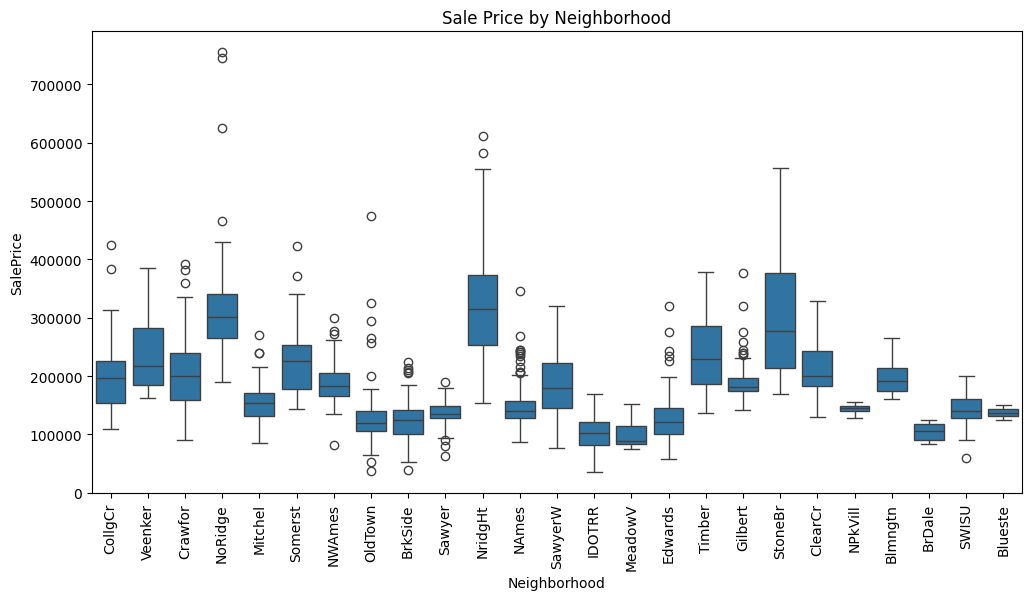

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)  # Use 'data=df' instead of just 'df'
plt.xticks(rotation=90)
plt.title('Sale Price by Neighborhood')
plt.show()



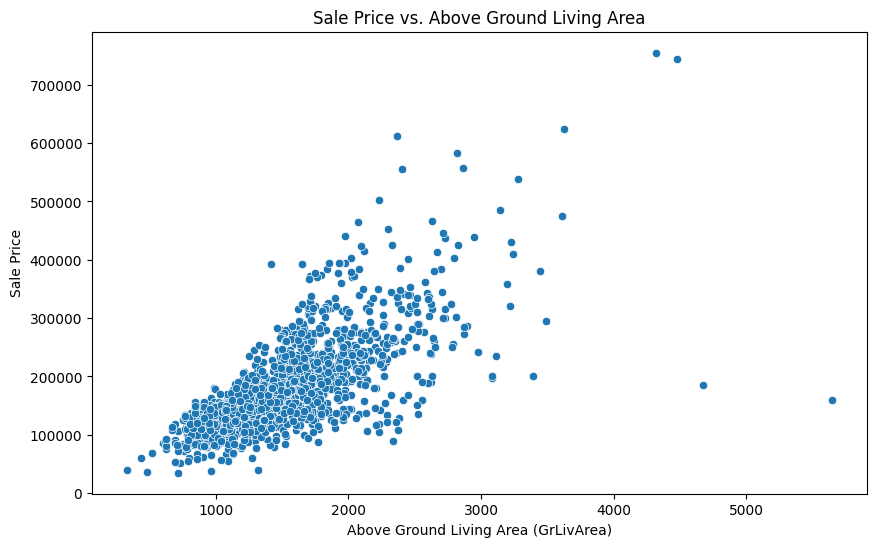

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Sale Price vs. Above Ground Living Area')
plt.xlabel('Above Ground Living Area (GrLivArea)')
plt.ylabel('Sale Price')
plt.show()


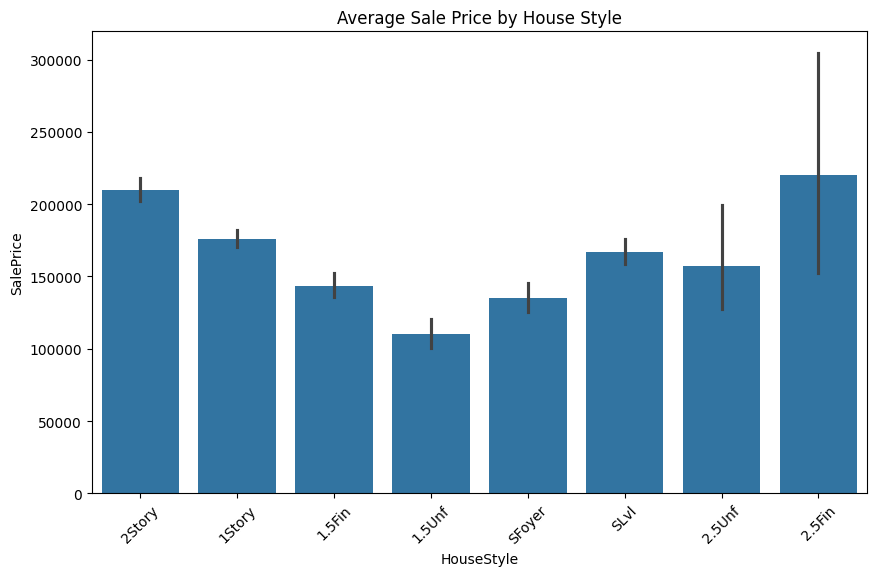

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='HouseStyle', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.title('Average Sale Price by House Style')
plt.show()


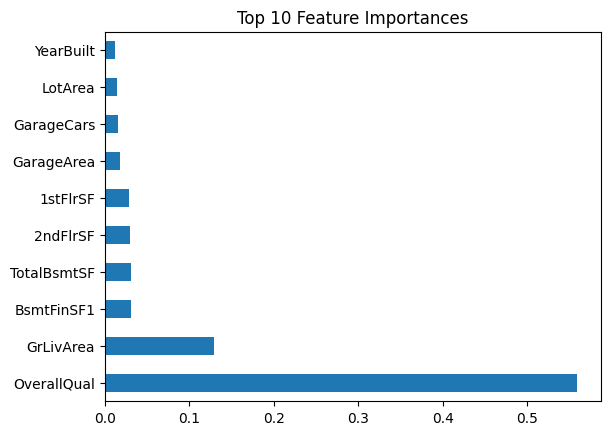

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame

# Step 1: Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Step 2: One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 3: Define X and y after encoding
X = df_encoded.drop('SalePrice', axis=1)  # Exclude target variable
y = df_encoded['SalePrice']

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 6: Get feature importances
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns)

# Step 7: Plot the top 10 feature importances
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 17520.40633561644
MSE: 845490793.2402153
RMSE: 29077.324382415507
R²: 0.8897712078466771


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_features': [None, 'sqrt'],  # Changed 'auto' to None
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)



Fitting 3 folds for each of 24 candidates, totalling 72 fits
{'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
pip install dash dash-bootstrap-components


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 11.5 MB/s eta 0:00:00


In [ ]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib  # for saving and loading your model

# Load your trained model
model = joblib.load('/content/drive/MyDrive/Colab Notebooks/house_price_model.pkl')  # Make sure to save your model beforehand

# Create Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': 'Feature 1', 'value': 'feature1'},
                 {'label': 'Feature 2', 'value': 'feature2'},
                 # Add other features as needed
                ],
        multi=True
    ),
    dcc.Input(id='input-value', type='number', placeholder='Enter value'),
    html.Button('Predict', id='predict-button'),
    html.Div(id='output-div')
])

@app.callback(
    Output('output-div', 'children'),
    [Input('predict-button', 'n_clicks')],
    [Input('feature-dropdown', 'value'),
     Input('input-value', 'value')]
)
def update_output(n_clicks, selected_features, input_value):
    if n_clicks:
        # Prepare your input data here based on selected features
        # Example: data = [[input_value, ...]]
        prediction = model.predict(df)  # Make sure to shape data correctly
        return f'Predicted Sale Price: {prediction[0]}'
    return 'Enter values and click predict!'

if __name__ == '__main__':
    app.run_server(debug=True)





<IPython.core.display.Javascript object>